In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
X = df.drop(['Outcome'],axis = 1)
Y = df['Outcome']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

In [11]:
from sklearn import tree
df_decision_tree = tree.DecisionTreeClassifier(ccp_alpha=0.01)#build
df_decision_tree.fit(X_train,Y_train)#train
df_decision_tree.score(X_test,Y_test)#predict

y_pred = df_decision_tree.predict(X_test)
df_decision_tree.score(X_test,Y_test)

0.7316017316017316

In [12]:
y_pred = df_decision_tree.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[141,  16],
       [ 46,  28]], dtype=int64)

In [13]:
feature_names = X.columns
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [14]:
from sklearn.tree import export_graphviz
export_graphviz(df_decision_tree, out_file="Decision_Tree_Survived.dot", class_names=["Not Diabetes","Diabetes"],
               feature_names=feature_names, impurity=False, filled=True)

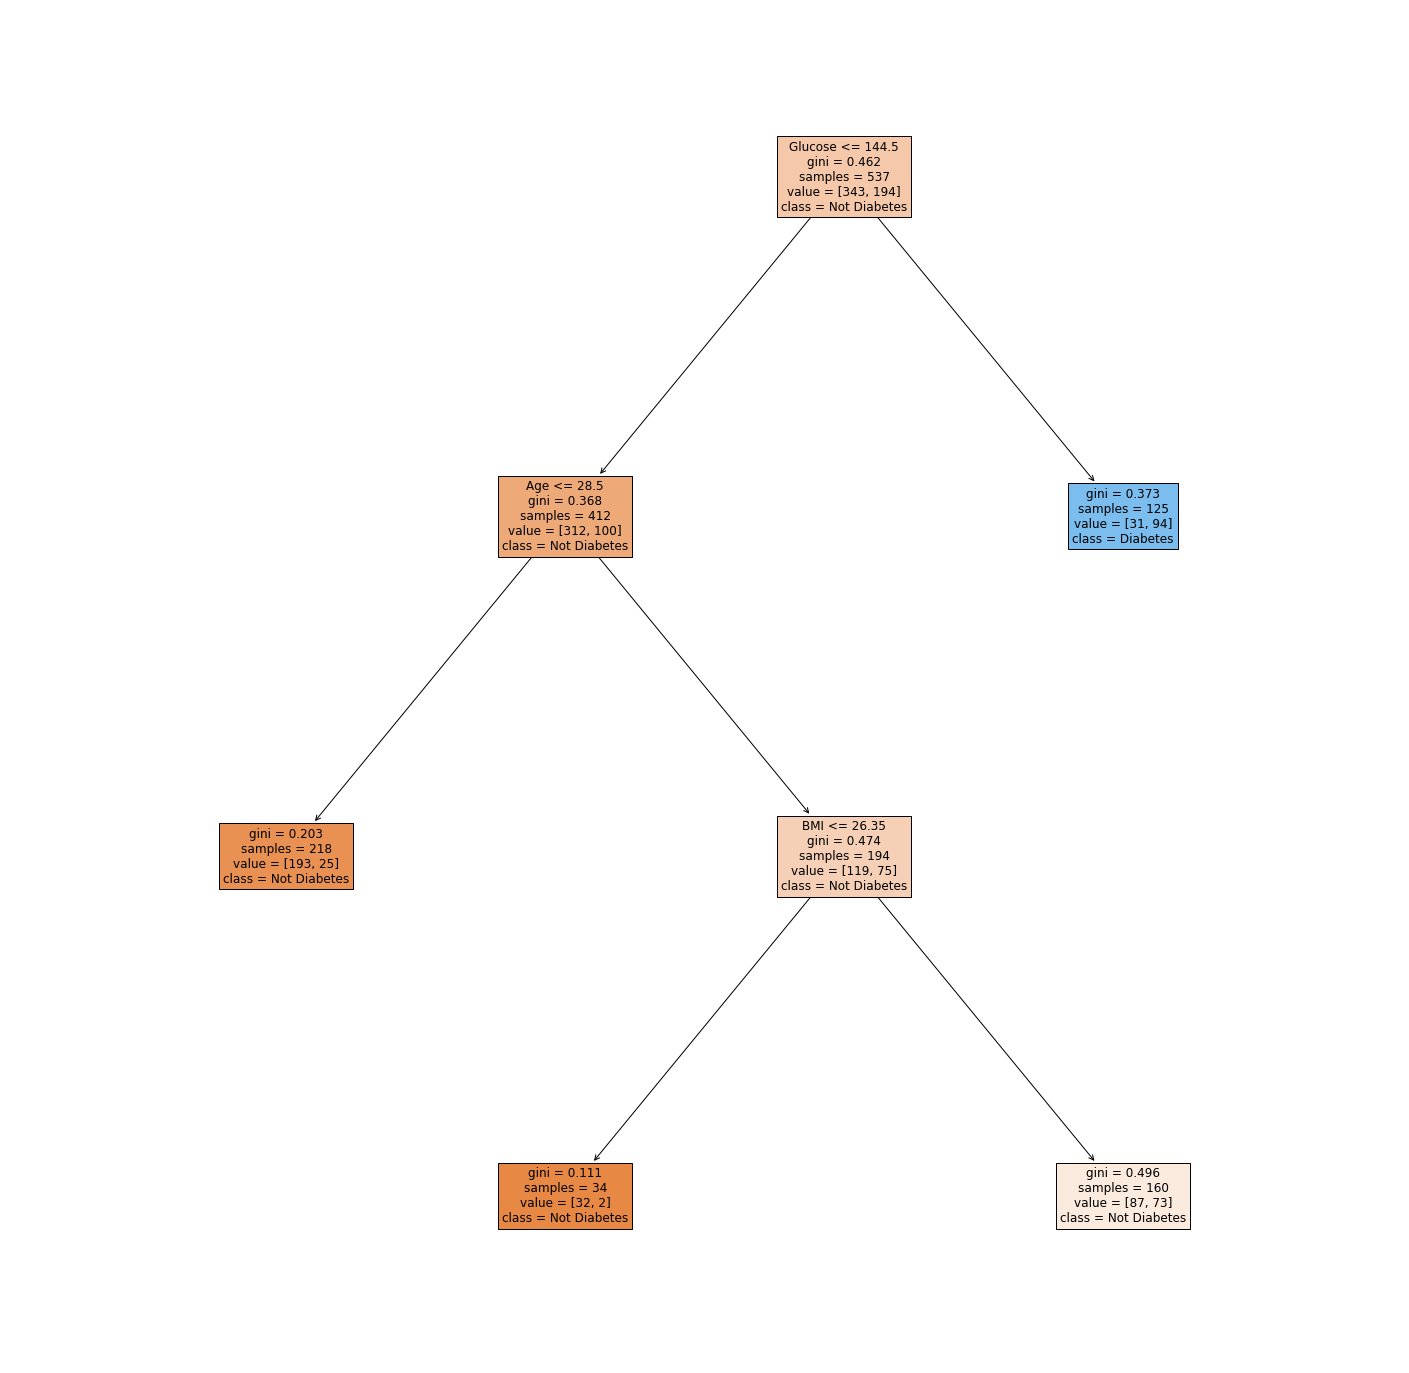

In [16]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure (figsize=(25,25))
_=tree.plot_tree(df_decision_tree, 
                   feature_names= feature_names,
                  class_names={0: 'Not Diabetes',1: 'Diabetes'},
                   filled=True,
                   fontsize=12)

In [17]:
df_decision_tree.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [18]:
from sklearn import ensemble
R_forest = ensemble.RandomForestClassifier(n_estimators=100)
R_forest.fit(X_train,Y_train)
R_forest.score(X_test,Y_test)

0.7792207792207793

In [19]:
y_pred = R_forest.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[140,  17],
       [ 34,  40]], dtype=int64)

In [20]:
R_forest.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [21]:
Grad_B = ensemble.GradientBoostingClassifier()
Grad_B.fit(X_train,Y_train)
Grad_B.score(X_test,Y_test)

0.7792207792207793

In [22]:
Grad_B.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [23]:
from sklearn.naive_bayes import GaussianNB
Naive_B = GaussianNB()
Naive_B.fit(X_train,Y_train)
Naive_B.score(X_test,Y_test)

0.7619047619047619

In [24]:
y_pred = Naive_B.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[138,  19],
       [ 36,  38]], dtype=int64)

In [29]:
Naive_B.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
K_Nearest_N = KNeighborsClassifier(n_neighbors=3)
K_Nearest_N.fit(X_train,Y_train)
K_Nearest_N.score(X_test,Y_test)

0.6926406926406926

In [26]:
y_pred = K_Nearest_N.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[123,  34],
       [ 37,  37]], dtype=int64)

In [30]:
K_Nearest_N.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [27]:
from sklearn.linear_model import LogisticRegression
Logistic_R = LogisticRegression()
Logistic_R.fit(X_train,Y_train)
Logistic_R.score(X_test,Y_test)

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7792207792207793

In [28]:
y_pred = Logistic_R.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[141,  16],
       [ 35,  39]], dtype=int64)

In [31]:
Logistic_R.predict([[6,148,72,35,0,33.6,0.627,50]])

C:\Users\MrBento\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)